In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#pip install tensorflow

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

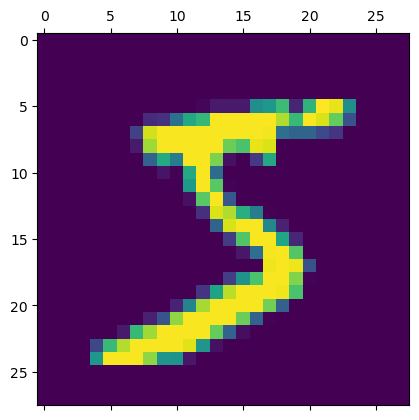

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flattening the x_train array

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

# Model evaluation

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9265


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2669 - accuracy: 0.9255


[0.26694273948669434, 0.9254999756813049]

# Prediction based on model

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.5584416e-02, 4.0559985e-07, 4.4110853e-02, 9.5732689e-01,
       2.0584243e-03, 1.3706799e-01, 7.2722628e-07, 9.9981254e-01,
       7.9325080e-02, 6.7359626e-01], dtype=float32)

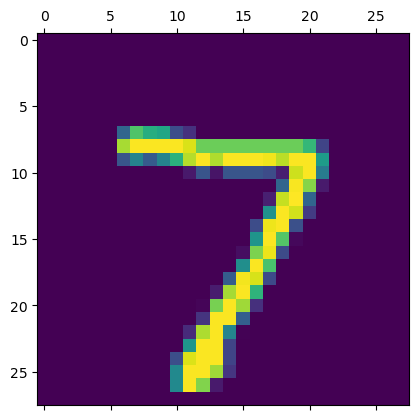

In [20]:
plt.matshow(X_test[0])

Argmax finds index of the maximum element in an array in numpy

In [21]:
np.argmax(y_predicted[0])

7

# Using list comprehension to store the result of argmax in a list to label

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

# Confusion Matrix

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    9,  922,   15,    8,    5,   11,   11,   38,    5],
       [   3,    0,   21,  914,    1,   33,    2,   10,   17,    9],
       [   1,    1,    5,    1,  914,    0,    9,    4,    8,   39],
       [   8,    2,    4,   20,   11,  799,   11,    3,   28,    6],
       [  12,    3,    8,    1,    8,   18,  904,    2,    2,    0],
       [   2,    6,   21,    7,    7,    1,    0,  945,    1,   38],
       [   8,    7,    6,   25,    9,   33,    9,   12,  855,   10],
       [  11,    7,    1,   11,   25,    8,    0,   16,    3,  927]])>

Text(95.72222222222221, 0.5, 'Truth')

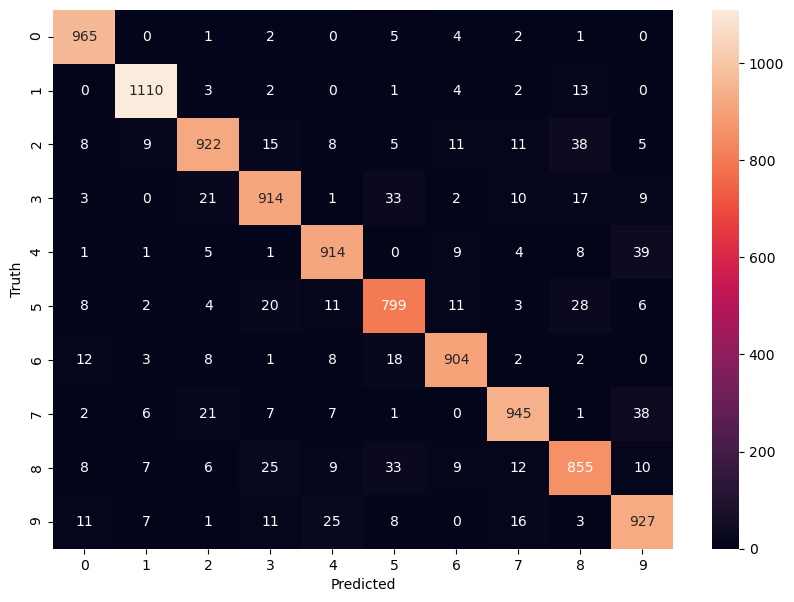

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer inside keras model to improve accuracy

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2751 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1245 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0868 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9835


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9766


[0.08028023689985275, 0.9765999913215637]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

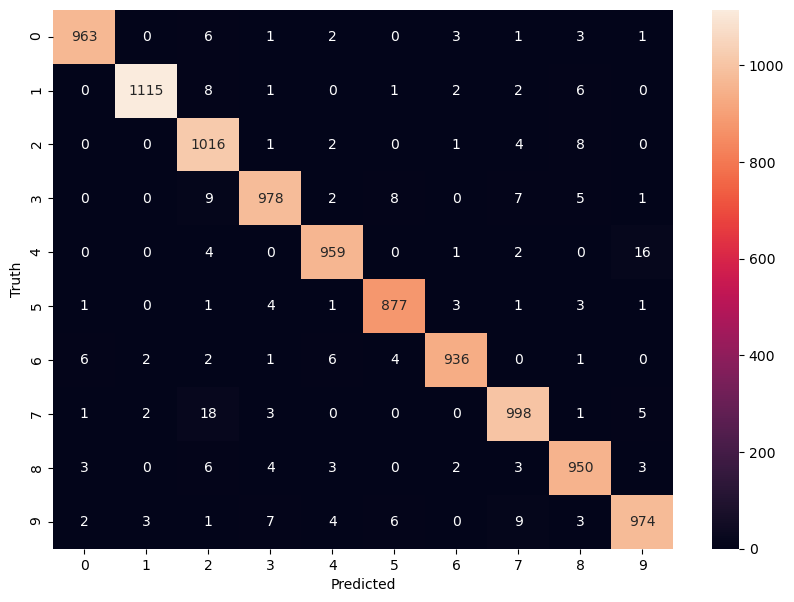

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten feature of keras so that we don't have to manually flatten X_train everytime

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2749 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

# Model Evaluation and Accuracy

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9781


[0.07837611436843872, 0.9781000018119812]